Accuracy: 0.7920
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.89      0.87        56
      Normal_Weight       0.62      0.74      0.68        62
     Obesity_Type_I       0.82      0.69      0.75        78
    Obesity_Type_II       0.80      0.91      0.85        58
   Obesity_Type_III       0.95      1.00      0.98        63
 Overweight_Level_I       0.72      0.61      0.66        56
Overweight_Level_II       0.78      0.70      0.74        50

           accuracy                           0.79       423
          macro avg       0.79      0.79      0.79       423
       weighted avg       0.79      0.79      0.79       423

False Positive Rate (FPR) per class:
Insufficient_Weight: 0.0245
Normal_Weight: 0.0776
Obesity_Type_I: 0.0348
Obesity_Type_II: 0.0356
Obesity_Type_III: 0.0083
Overweight_Level_I: 0.0354
Overweight_Level_II: 0.0268


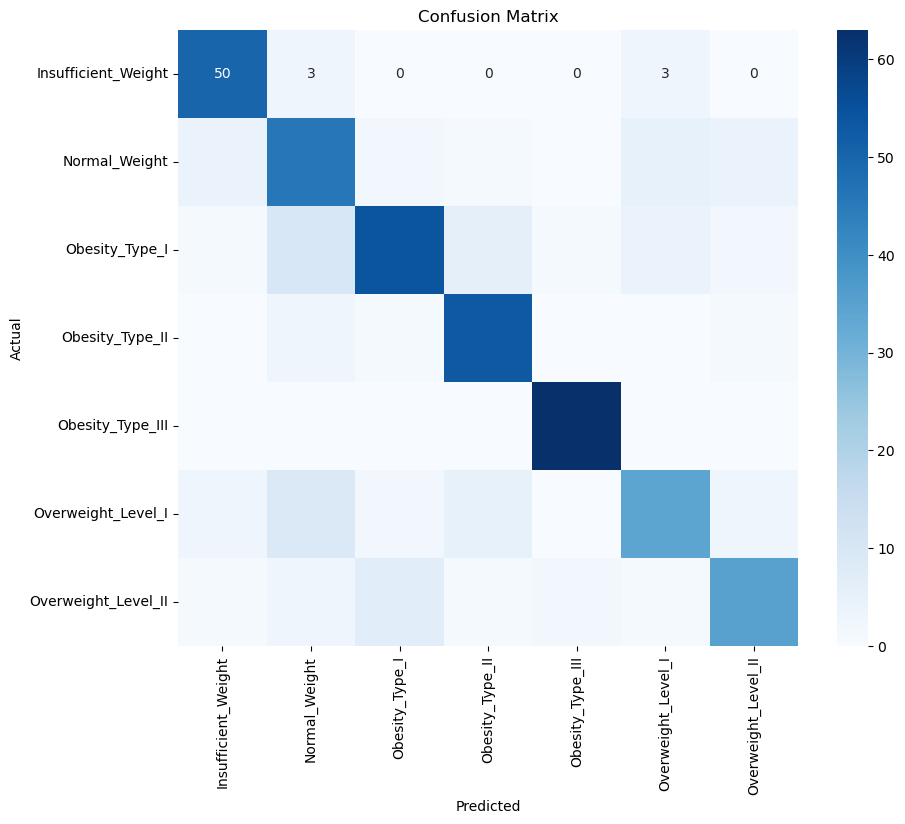

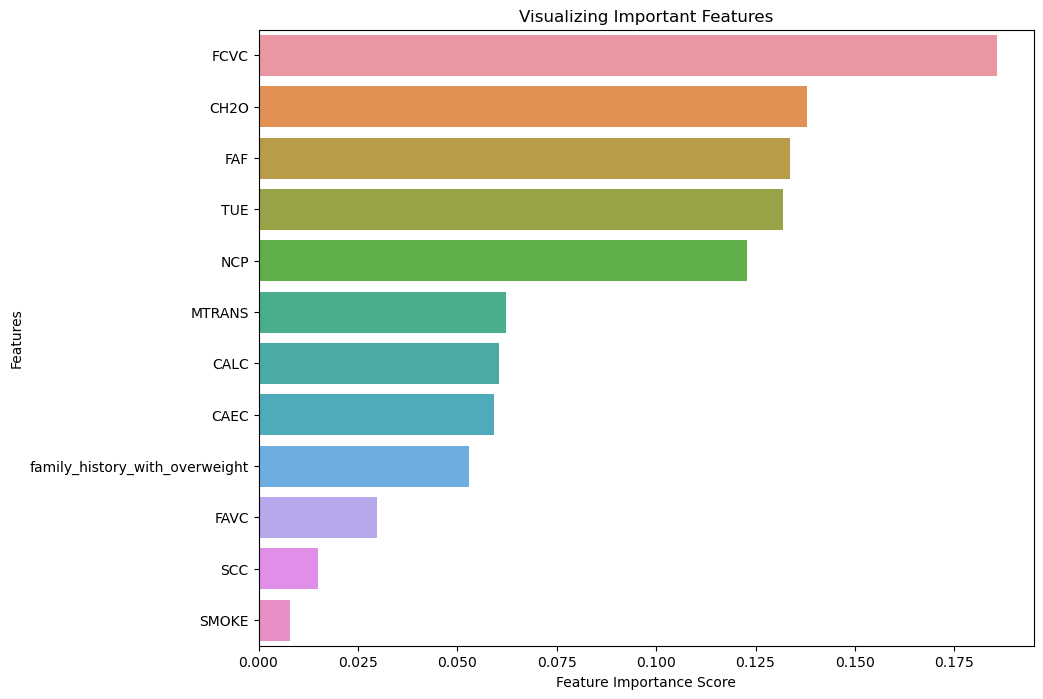

C:\Users\최찬우\AppData\Local\Temp\ipykernel_9684\2808334203.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high_bmi[column] = le.transform(X_high_bmi[column])
C:\Users\최찬우\AppData\Local\Temp\ipykernel_9684\2808334203.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high_bmi[column] = le.transform(X_high_bmi[column])
C:\Users\최찬우\AppData\Local\Temp\ipykernel_9684\2808334203.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Accuracy (BMI >= 25): 0.8377
Classification Report (BMI >= 30):
                     precision    recall  f1-score   support

     Obesity_Type_I       0.77      0.88      0.82        57
    Obesity_Type_II       0.88      0.88      0.88        69
   Obesity_Type_III       0.97      1.00      0.98        61
 Overweight_Level_I       0.75      0.73      0.74        59
Overweight_Level_II       0.80      0.69      0.74        62

           accuracy                           0.84       308
          macro avg       0.83      0.84      0.83       308
       weighted avg       0.84      0.84      0.84       308



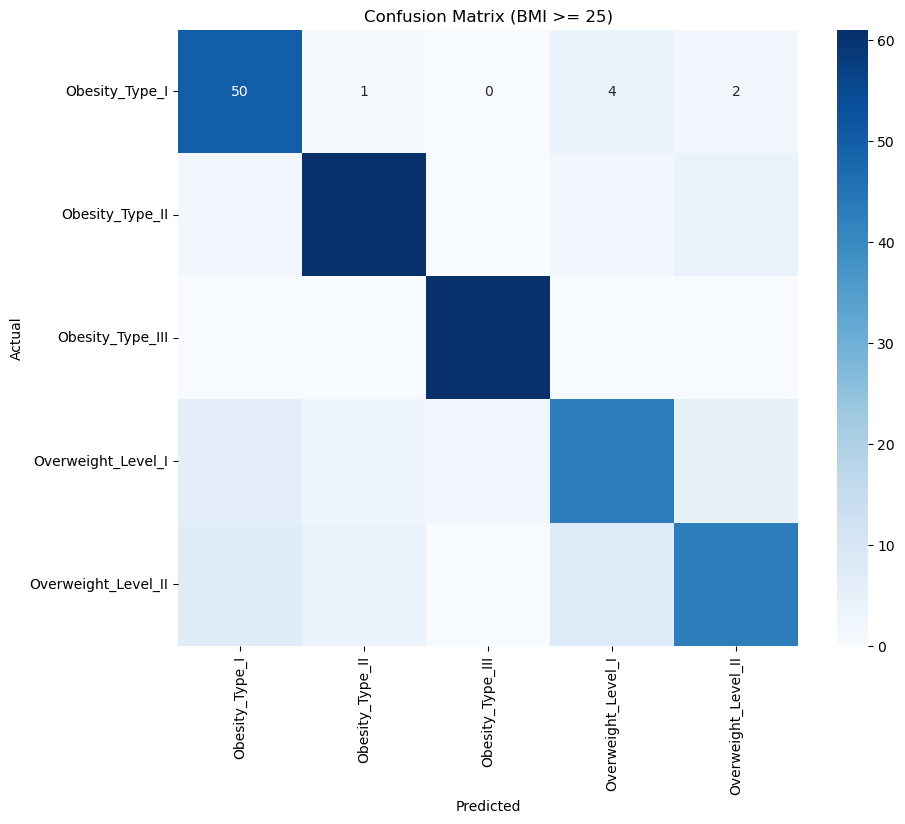

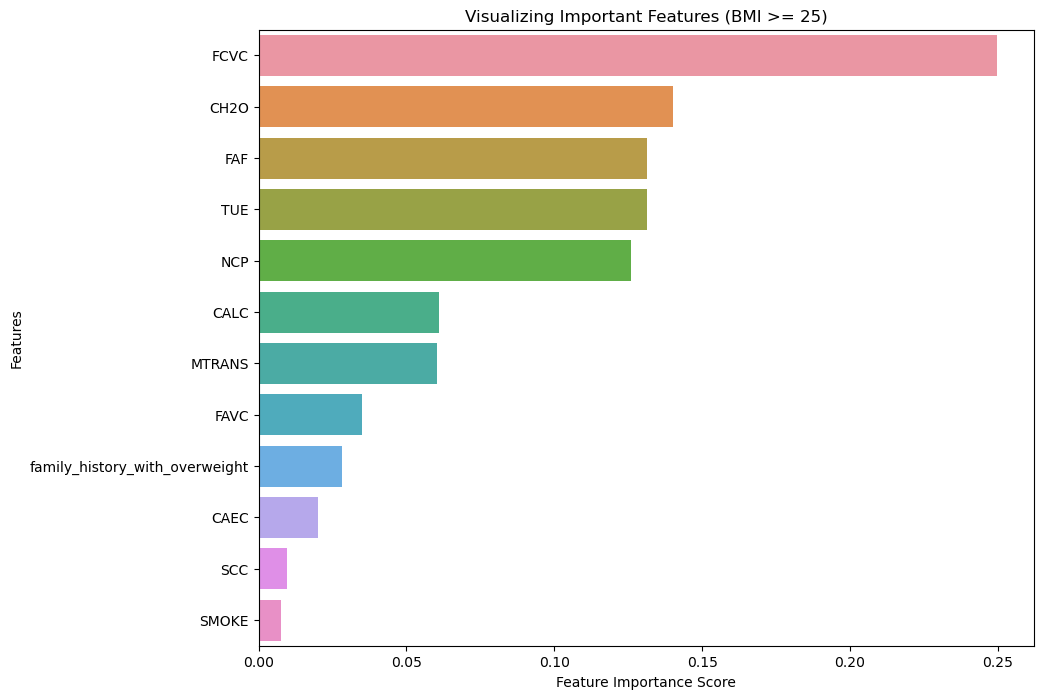

몸무게(kg):  70
키(cm):  180
주당 운동 시간:  2
자주 고열량 음식 섭취 여부 (yes/no):  yes
채소 섭취 빈도:  4
식사 사이에 간식 섭취 빈도 (no/Sometimes/Frequently/Always):  no
음주 빈도 (no/Sometimes/Frequently/Always):  Frequently
하루 식사 수:  3
하루 물 섭취량:  3
가족 중 비만 여부 (yes/no):  no
자신이 비만인지 아닌지 인식 여부 (yes/no):  yes
흡연 여부 (yes/no):  no
평일 TV 시청 시간:  0
주 이동수단 (Public_Transportation/Walking/Automobile/Motorbike/Bike):  Walking


New Data Prediction: Insufficient_Weight
New Data Rank: 387 out of 2112
New Data Total Score: 20.604938271604937


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # numpy 임포트


# CSV 파일 경로
file_path = "ObesityDataSet_raw_and_data_sinthetic_BMI.csv"

# CSV 파일 로드
data = pd.read_csv(file_path)

# 특성별 데이터 분리
physical_activity = data[['FAF']]
diet1 = data[['FAVC', 'FCVC', 'CAEC', 'CALC']]
diet2 = data[['NCP', 'CH2O']]
family_history = data[['family_history_with_overweight']]
others = data[['SCC', 'SMOKE', 'TUE', 'MTRANS']]

# 모든 특성들을 하나의 데이터프레임으로 결합
X = pd.concat([physical_activity, diet1, diet2, family_history, others], axis=1)

# 타겟 변수 선택 (비만 여부)
target = 'NObeyesdad'
y = data[target]

# 라벨 인코딩 (좋은 식습관 및 생활습관에 높은 숫자 부여)
label_encoder_dict = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoder_dict[column] = le

# 타겟 변수 인코딩
target_label_encoder = LabelEncoder()
y = target_label_encoder.fit_transform(y)

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터셋 분리 (훈련:테스트 = 0.9:0.1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화 및 학습
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

# FPR 계산 및 출력
def calculate_fpr(conf_matrix):
    fpr = []
    for i in range(len(conf_matrix)):
        fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        tn = np.sum(conf_matrix) - (np.sum(conf_matrix[i, :]) + fp)
        fpr.append(fp / (fp + tn))
    return fpr

fpr = calculate_fpr(conf_matrix)
fpr_dict = {target_label_encoder.classes_[i]: fpr[i] for i in range(len(fpr))}

print('False Positive Rate (FPR) per class:')
for class_name, rate in fpr_dict.items():
    print(f'{class_name}: {rate:.4f}')


# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_label_encoder.classes_, yticklabels=target_label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 피처 중요도 시각화
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# BMI가 25 이상인 데이터 필터링
high_bmi_data = data[data['BMI'] >= 25]

# 필터링된 데이터에 대해 같은 분석 수행 (데이터 준비, 학습, 평가 등)
# 데이터 준비
X_high_bmi = high_bmi_data[X.columns]
y_high_bmi = high_bmi_data[target]

# 라벨 인코딩 (이전에 학습된 라벨 인코더 사용)
for column in X_high_bmi.columns:
    if X_high_bmi[column].dtype == 'object':
        le = label_encoder_dict[column]
        X_high_bmi[column] = le.transform(X_high_bmi[column])

# 타겟 변수 인코딩
y_high_bmi = target_label_encoder.transform(y_high_bmi)

# 데이터 표준화
X_high_bmi_scaled = scaler.transform(X_high_bmi)

# 데이터셋 분리 (훈련:테스트 = 0.9:0.1)
X_train_high_bmi, X_test_high_bmi, y_train_high_bmi, y_test_high_bmi = train_test_split(X_high_bmi_scaled, y_high_bmi, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model_high_bmi = RandomForestClassifier(n_estimators=200, random_state=42)
model_high_bmi.fit(X_train_high_bmi, y_train_high_bmi)

# 예측
y_pred_high_bmi = model_high_bmi.predict(X_test_high_bmi)

# 실제 테스트 데이터셋에서 사용된 클래스 확인
unique_classes_in_test = sorted(set(y_test_high_bmi))

# 결과 평가
accuracy_high_bmi = accuracy_score(y_test_high_bmi, y_pred_high_bmi)
# 여기에서 타겟 변수 인코더 사용해서 실제 테스트 데이터셋에서 사용된 클래스만 포함하도록 클래스 이름 지정
report_high_bmi = classification_report(y_test_high_bmi, y_pred_high_bmi, target_names=[target_label_encoder.classes_[i] for i in unique_classes_in_test])
conf_matrix_high_bmi = confusion_matrix(y_test_high_bmi, y_pred_high_bmi)

print(f'Accuracy (BMI >= 25): {accuracy_high_bmi:.4f}')
print('Classification Report (BMI >= 30):')
print(report_high_bmi)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_high_bmi, annot=True, fmt='d', cmap='Blues', xticklabels=[target_label_encoder.classes_[i] for i in unique_classes_in_test], yticklabels=[target_label_encoder.classes_[i] for i in unique_classes_in_test])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (BMI >= 25)')
plt.show()

# 피처 중요도 시각화
feature_importances_high_bmi = pd.Series(model_high_bmi.feature_importances_, index=X.columns)
feature_importances_high_bmi = feature_importances_high_bmi.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances_high_bmi, y=feature_importances_high_bmi.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features (BMI >= 25)')
plt.show()

# 사용자 입력 받기
def get_user_input():
    user_data = {}
    user_data['Weight'] = float(input('몸무게(kg): '))
    user_data['Height'] = float(input('키(cm): '))
    user_data['FAF'] = float(input('주당 운동 시간: '))
    user_data['FAVC'] = input('자주 고열량 음식 섭취 여부 (yes/no): ')
    user_data['FCVC'] = float(input('채소 섭취 빈도: '))
    user_data['CAEC'] = input('식사 사이에 간식 섭취 빈도 (no/Sometimes/Frequently/Always): ')
    user_data['CALC'] = input('음주 빈도 (no/Sometimes/Frequently/Always): ')
    user_data['NCP'] = float(input('하루 식사 수: '))
    user_data['CH2O'] = float(input('하루 물 섭취량: '))
    user_data['family_history_with_overweight'] = input('가족 중 비만 여부 (yes/no): ')
    user_data['SCC'] = input('자신이 비만인지 아닌지 인식 여부 (yes/no): ')
    user_data['SMOKE'] = input('흡연 여부 (yes/no): ')
    user_data['TUE'] = float(input('평일 TV 시청 시간: '))
    user_data['MTRANS'] = input('주 이동수단 (Public_Transportation/Walking/Automobile/Motorbike/Bike): ')
    return user_data

# 새로운 데이터 입력 받기
new_data = get_user_input()

# BMI 계산
new_data['BMI'] = new_data['Weight'] / (new_data['Height'] / 100) ** 2

# 입력 데이터 프레임으로 변환
new_data_df = pd.DataFrame([new_data])

# 라벨 인코딩
for column in new_data_df.columns:
    if new_data_df[column].dtype == 'object':
        le = label_encoder_dict[column]
        new_data_df[column] = le.transform(new_data_df[column])

# 데이터 표준화
new_data_scaled = scaler.transform(new_data_df[X.columns])

# 예측
new_pred = model.predict(new_data_scaled)
new_pred_class = target_label_encoder.inverse_transform(new_pred)
print(f'New Data Prediction: {new_pred_class[0]}')

# 훈련 데이터 기준으로 BMI가 낮은 순과 좋은 식습관, 좋은 생활습관 순으로 우선 정렬
data['BMI_Score'] = data['BMI']
data['Diet_Lifestyle_Score'] = data['FCVC'] + data['CH2O'] - data['CALC'].map({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}) - data['NCP'] + data['FAF'] - data['FAVC'].map({'yes': 1, 'no': 0}) - data['CAEC'].map({'Always': 2, 'Frequently': 1, 'Sometimes': 0, 'no': -1})

# Total Score 계산
data['Total_Score'] = data['BMI'] - data['Diet_Lifestyle_Score']

# Total Score 계산을 위해 필요한 열 추가
new_data_df['BMI_Score'] = new_data_df['BMI']
new_data_df['Diet_Lifestyle_Score'] = new_data_df['FCVC'] + new_data_df['CH2O'] - new_data_df['CALC'] - new_data_df['NCP'] + new_data_df['FAF'] - new_data_df['FAVC'] - new_data_df['CAEC']
new_data_df['Total_Score'] = new_data_df['BMI'] - new_data_df['Diet_Lifestyle_Score']

# 입력된 데이터를 기존 데이터에 추가
data_with_new_sorted = pd.concat([data, new_data_df], ignore_index=True)

# Total Score 순으로 내림차순 정렬
data_with_new_sorted = data_with_new_sorted.sort_values(by=['Total_Score'], ascending=True).reset_index(drop=True)

# 새로운 데이터의 위치 찾기
new_data_index = data_with_new_sorted[data_with_new_sorted['Total_Score'] == new_data_df['Total_Score'].values[0]].index[0]

# 정렬된 데이터와 입력된 데이터 위치 출력
print(f'New Data Rank: {new_data_index + 1} out of {len(data_with_new_sorted)}')

# 입력한 데이터의 Total Score 값 출력
print(f'New Data Total Score: {new_data_df["Total_Score"].values[0]}')
